<a href="https://colab.research.google.com/github/abhijithb200/matplotlib/blob/main/KNN_Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors 

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
x = data[['sepal_length','sepal_width']]

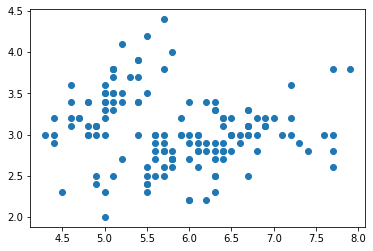

In [ ]:
plt.scatter(x['sepal_length'],x['sepal_width'])


In [ ]:
nbrs = NearestNeighbors(n_neighbors=10)
nbrs.fit(x)

NearestNeighbors(n_neighbors=10)

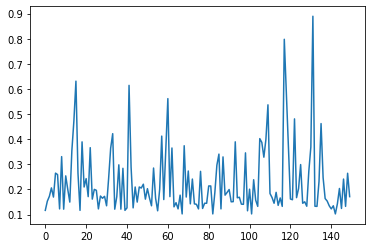

In [ ]:
distances,index = nbrs.kneighbors()
plt.plot(distances.mean(axis=1))

In [ ]:
outlier_index = np.where(distances.mean(axis=1)>0.5)

In [ ]:
outlier_index

(array([117, 131]),)

In [ ]:
data.iloc[outlier_index]

,sepal_length,sepal_width,petal_length,petal_width,species
117,7.7,3.8,6.7,2.2,virginica
131,7.9,3.8,6.4,2.0,virginica


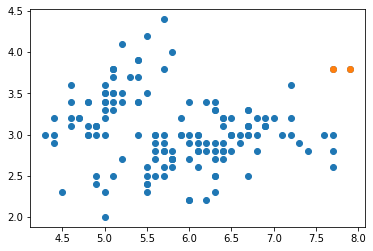

In [ ]:
plt.scatter(x['sepal_length'],x['sepal_width'])
plt.scatter(data.iloc[outlier_index]['sepal_length'],data.iloc[outlier_index]['sepal_width'])

In [ ]:
y = data['species']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=30,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modal = KNeighborsClassifier(n_neighbors=5)
modal.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
modal.score(x_test,y_test)

0.8